**Elizabeth Stopa**

**05/07/2024**

# Final Project Part 5

### This milestone of the final project will be to read in the datasets that were previously cleaned in the last milestone of the project, and then aggregate functions will be performed on these datasets in order to answer all of the questions listed below. In this notebook, a few more temporary cleaning steps were added for each quesiton to better analyze the data in order to answer the questions. The answers to questions 2, 3, 4 and 5 are also visually represented in bar plots to compare the obtained data to similar data.

**The original datasets used in this final project were taken from Kaggle.com and are included here: 
https://www.kaggle.com/datasets/dgawlik/nyse?resource=download&select=prices.csv**

**Previously cleaned datasets from the last milestone of the project "Securities_Cleaned.csv", "Fundamentals_Cleaned.csv", and "Prices_Split_Adjusted_Cleaned.csv" are also included and read in as pandas dataframes, and used in both questions.** 

*Cited Sources: chatGPT, StackOverflow, Kaggle*

**Questions**
1. What date did Aetna Inc have the highest "high" in 2016?
2. Which company had the lowest "low" in March of 2013?
3. What was the average gross profit of General Motors between 2013 and 2016?
4. What was the average total revenue of Amazon.com Inc from 2013 to 2016?
5. What was the total liability of Netflix Inc. in 2014?

*Importing pandas to read in the previously cleaned and saved datasets, and to do some additional cleaning to better aggregate the data. Importing matplotlib.pyplot to make plots to visualize the answers to the questions.*

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

## **Question 1: What date did Aetna Inc have the highest "high" in 2016?**

### Dataset 2: "Securities"

*Reading in the previously cleaned "Securities" file using pandas.*

In [101]:
df2 = pd.read_csv('Securities_Cleaned.csv')
df2

,Unnamed: 0,Ticker symbol,Security
0,0,MMM,3M Company
1,1,ABT,Abbott Laboratories
2,2,ABBV,AbbVie
3,3,ACN,Accenture plc
4,4,ATVI,Activision Blizzard
...,...,...,...
500,500,YHOO,Yahoo Inc.
501,501,YUM,Yum! Brands Inc
502,502,ZBH,Zimmer Biomet Holdings
503,503,ZION,Zions Bancorp


*Defining a variabl.e to the name of the company that I want to obtain data for, and finding the row in this dataset where the value in the Security colunn equals the name of the company, "Aetna Inc".*

In [102]:
company_name = df2[(df2['Security']=='Aetna Inc')]
ticker = company_name['Ticker symbol'].values[0]
ticker

'AET'

### Dataset 4: "Prices-Split-Adjusted"

*Reading in the previously cleaned "Prices-Split-Adjusted" file using pandas.*

In [103]:
df3 = pd.read_csv('Prices_Split_Adjusted_Cleaned.csv')
df3

,Unnamed: 0,date,symbol,low,high
0,0,2016-01-05,WLTW,122.309998,126.250000
1,1,2016-01-06,WLTW,119.940002,125.540001
2,2,2016-01-07,WLTW,114.930000,119.739998
3,3,2016-01-08,WLTW,113.500000,117.440002
4,4,2016-01-11,WLTW,114.089996,117.330002
...,...,...,...,...,...
851259,851259,2016-12-30,ZBH,102.849998,103.930000
851260,851260,2016-12-30,ZION,42.689999,43.310001
851261,851261,2016-12-30,ZTS,53.270000,53.740002
851262,851262,2016-12-30,AIV,44.410000,45.590000


*Converting the values in the "date" column in df3 to a datetime format so that data analysis can be more easily performed on it.*

In [107]:
df3['date'] = pd.to_datetime(df3['date'])

*Cleaning and defining the Prices-Split-Adjusted dataset to a new dataset to include only the rows where the value in the symbol column equals the ticker symbol, "AET" and the value of the year in the date column equals 2016.*

In [108]:
df4 = df3[(df3['symbol']=='AET') & (df3['date'].dt.year == 2016)]
df4

,Unnamed: 0,date,symbol,low,high
725407,725407,2016-01-04,AET,106.019997,109.260002
725906,725906,2016-01-05,AET,109.199997,111.199997
726405,726405,2016-01-06,AET,109.089996,110.980003
726904,726904,2016-01-07,AET,108.250000,111.230003
727403,727403,2016-01-08,AET,106.269997,110.459999
...,...,...,...,...,...
848781,848781,2016-12-23,AET,124.309998,126.400002
849281,849281,2016-12-27,AET,125.110001,127.320000
849781,849781,2016-12-28,AET,124.519997,126.889999
850281,850281,2016-12-29,AET,124.320000,125.360001


*Finding and printing the row that has the highest value in the "high" column and defining it to the variable "highest_high"*

In [109]:
highest_high = df4[df4['high'] == df4['high'].max()]
print(highest_high)

        Unnamed: 0       date symbol         low   high
841281      841281 2016-12-02    AET  132.979996  136.5


*Converting the format of the value in the "date" column in highest_high to "Year-month-day".*

In [110]:
highest_high['date'] = highest_high['date'].dt.strftime('%Y-%m-%d')
highest_high

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_13836\1883832382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_high['date'] = highest_high['date'].dt.strftime('%Y-%m-%d')


,Unnamed: 0,date,symbol,low,high
841281,841281,2016-12-02,AET,132.979996,136.5


*Extracting the value from the date column of highest_high and defining it to a new variable "highest_high_date" and printing it.*

In [111]:
highest_high_date = highest_high['date'].values[0]
print(highest_high_date)

2016-12-02


**Answer: Aetna Inc had the highest high in 2016 on December 2nd, 2016.**

## **Question 2: Which company had the lowest "low" in March of 2013?**

*Converting the "date" column in df3 to a datetime format, then defining a variable "dates" to the a selection of rows that have in their "date" column the value "3" for month to represent March and that have the value of "2013" for year. Then printing "dates".*

In [112]:
df3['date'] = pd.to_datetime(df3['date'])
dates = df3[(df3['date'].dt.month == 3) & (df3['date'].dt.year == 2013)]
print(dates)

        Unnamed: 0       date symbol        low       high
373668      373668 2013-03-01      A  29.134478  30.028612
373669      373669 2013-03-01    AAL  13.320000  13.950000
373670      373670 2013-03-01    AAP  75.620003  76.660004
373671      373671 2013-03-01   AAPL  61.425713  62.597141
373672      373672 2013-03-01   ABBV  36.549999  38.070000
...            ...        ...    ...        ...        ...
383343      383343 2013-03-28    YUM  50.970525  51.912294
383344      383344 2013-03-28    ZBH  73.419998  75.459999
383345      383345 2013-03-28   ZION  24.879999  25.040001
383346      383346 2013-03-28    ZTS  32.630001  33.500000
383347      383347 2013-03-28    AIV  30.360001  30.719999

[9680 rows x 5 columns]


*Cleaning and defining the Prices-Split-Adjusted dataset to a new dataset to include only the rows where the value in the date column equals "3" for the month of March and the value of the year in the date column equals 2013.*

In [113]:
df5 = df3[(df3['date'].dt.month == 3) & (df3['date'].dt.year == 2013)]
df5

,Unnamed: 0,date,symbol,low,high
373668,373668,2013-03-01,A,29.134478,30.028612
373669,373669,2013-03-01,AAL,13.320000,13.950000
373670,373670,2013-03-01,AAP,75.620003,76.660004
373671,373671,2013-03-01,AAPL,61.425713,62.597141
373672,373672,2013-03-01,ABBV,36.549999,38.070000
...,...,...,...,...,...
383343,383343,2013-03-28,YUM,50.970525,51.912294
383344,383344,2013-03-28,ZBH,73.419998,75.459999
383345,383345,2013-03-28,ZION,24.879999,25.040001
383346,383346,2013-03-28,ZTS,32.630001,33.500000


*Finding and printing the row that has the lowest value in the "low" column and defining it to the variable "lowest_low".*

In [114]:
lowest_low = df5[df5['low'] == df5['low'].min()]
print(lowest_low)

        Unnamed: 0       date symbol   low  high
383050      383050 2013-03-28    FTR  3.71   4.0


*Extracting the value from the symbol column of lowest_low and defining it to a new variable "lowest_low_ticker" and printing it.*

In [115]:
lowest_low_ticker = lowest_low['symbol'].values[0]
print(lowest_low_ticker)

FTR


*Defining a variable "selected_ticker" to the ticker symbol that was found in the previous step, and finding the name of the company in this dataset where the value in the Ticker Symbol column equals the ticker symbol, "FTR".* 

In [116]:
ticker2 = "FTR"
selected_row = df2[df2['Ticker symbol']==ticker2]
company_name2 = selected_row['Security'].values[0]
print(company_name2)

Frontier Communications


**Answer: The company with the lowest low in March of 2013 was Frontier Communications.**

## **Question 3: What was the average gross profit of General Motors between 2013 and 2016?**

*Defining a variable to the name of the company that I want to obtain data for, and finding the row in this dataset where the value in the Security colunn equals the name of the company, "General Motors".*

In [117]:
company_name3 = "General Motors"
selected_row2 = df2[df2['Security']==company_name3]
ticker3 = selected_row2['Ticker symbol'].values[0]
print(ticker3)

GM


*This shows that the Ticker symbol for Goldman Sachs Group is 'GS', which will be used to find information on the company in the Fundamentals dataset.*

*Defining a variable to the ticker symbol that I want to obtain data for from this dataset, and finding the rows in this dataset where the value in the Ticker Symbol column equals the ticker symbol, "GM".*

In [118]:
ticker_symbol = "GM"
selected_rows3 = df[df['Ticker Symbol']==ticker_symbol]
print(selected_rows3)

     Unnamed: 0 Ticker Symbol Period Ending  Gross Profit  Total Liabilities  \
700         700            GM    2013-12-31  1.805400e+10       1.237370e+11   
701         701            GM    2014-12-31  1.380800e+10       1.420440e+11   
702         702            GM    2015-12-31  1.830200e+10       1.544670e+11   
703         703            GM    2016-12-31  2.125500e+10       1.778540e+11   

     Total Revenue  Year  
700   1.554270e+11  2013  
701   1.559290e+11  2014  
702   1.523560e+11  2015  
703   1.663800e+11  2016  


*Cleaning and defining the fundamentals dataset to a new dataset to include only the information that I found above.*

In [119]:
df6 = df[df['Ticker Symbol']=='GM']
df6

,Unnamed: 0,Ticker Symbol,Period Ending,Gross Profit,Total Liabilities,Total Revenue,Year
700,700,GM,2013-12-31,1.805400e+10,1.237370e+11,1.554270e+11,2013
701,701,GM,2014-12-31,1.380800e+10,1.420440e+11,1.559290e+11,2014
702,702,GM,2015-12-31,1.830200e+10,1.544670e+11,1.523560e+11,2015
703,703,GM,2016-12-31,2.125500e+10,1.778540e+11,1.663800e+11,2016


*Calculating and printing the average of values in the "Gross Profit" column in this new dataset.*

In [120]:
average = df6['Gross Profit'].mean()
average

17854750000.0

**The average gross profit that General Motors had from 2013 to 2016 was $17854750000.0.**

*Creating and displaying a bar graph with the "Period Ending" of the new dataset on the x-axis, and the "Gross Profit" of the new dataset on the y axis, along with axis and title labels, colors, and other structural details.*

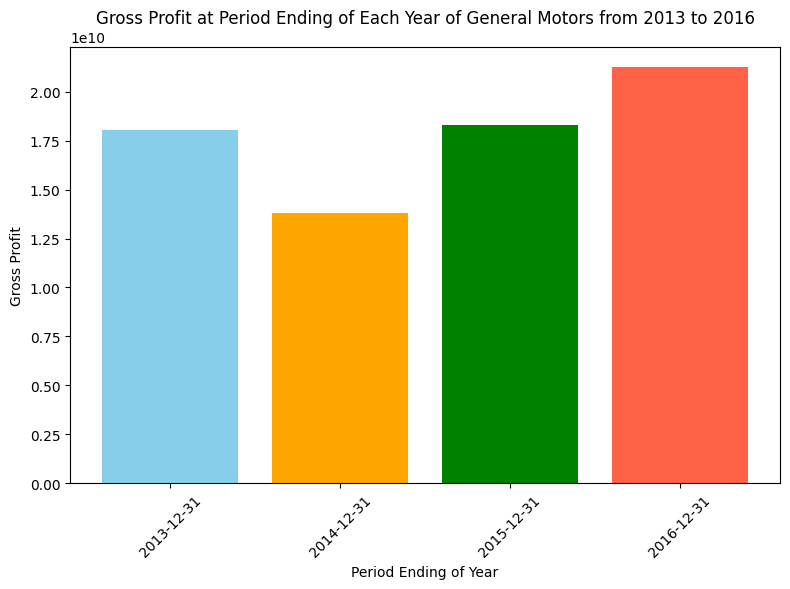

In [122]:
colors = ['skyblue', 'orange', 'green', 'tomato']
plt.figure(figsize=(8,6))
plt.bar(df6['Period Ending'], df6['Gross Profit'], color=colors)
plt.xlabel('Period Ending of Year')
plt.ylabel('Gross Profit')
plt.title('Gross Profit at Period Ending of Each Year of General Motors from 2013 to 2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Question 4: What was the average total revenue of Amazon.com Inc from 2013 to 2016?**

*Defining a variable to the name of the company that I want to obtain data for, and finding the row in this dataset where the value in the Security colunn equals the name of the company, "Amazon.com Inc".*

In [123]:
company_name4 = "Amazon.com Inc"
selected_row4 = df2[df2['Security']==company_name4]
ticker4 = selected_row4['Ticker symbol'].values[0]
print(ticker4)

AMZN


*Defining a variable to the ticker symbol that I want to obtain data for from this dataset, and finding the rows in this dataset where the value in the Ticker Symbol column equals the ticker symbol, "AMZN".*

In [124]:
ticker_symbol2 = "AMZN"
selected_rows5 = df[df['Ticker Symbol']==ticker_symbol2]
print(selected_rows5)

     Unnamed: 0 Ticker Symbol Period Ending  Gross Profit  Total Liabilities  \
120         120          AMZN    2013-12-31  2.027100e+10       3.041300e+10   
121         121          AMZN    2014-12-31  2.623600e+10       4.376400e+10   
122         122          AMZN    2015-12-31  3.535500e+10       5.136300e+10   
123         123          AMZN    2016-12-31  4.772200e+10       6.411700e+10   

     Total Revenue  Year  
120   7.445200e+10  2013  
121   8.898800e+10  2014  
122   1.070060e+11  2015  
123   1.359870e+11  2016  


*Cleaning and defining the fundamentals dataset to a new dataset to include only the information that I found above.*

In [125]:
df7 = df[df['Ticker Symbol']=='AMZN']
df7

,Unnamed: 0,Ticker Symbol,Period Ending,Gross Profit,Total Liabilities,Total Revenue,Year
120,120,AMZN,2013-12-31,2.027100e+10,3.041300e+10,7.445200e+10,2013
121,121,AMZN,2014-12-31,2.623600e+10,4.376400e+10,8.898800e+10,2014
122,122,AMZN,2015-12-31,3.535500e+10,5.136300e+10,1.070060e+11,2015
123,123,AMZN,2016-12-31,4.772200e+10,6.411700e+10,1.359870e+11,2016


*Calculating and printing the average of values in the "Total Revenue" column in this new dataset.*

In [126]:
average2 = df7['Total Revenue'].mean()
average2

101608250000.0

**The average total revenue of Amazon from 2013 to 2016 was about $101608250000.0.**

*Creating and displaying a bar graph with the "Period Ending" of the new dataset on the x-axis, and the "Total Revenue" of the new dataset on the y axis, along with axis and title labels, colors, and other structural details.*

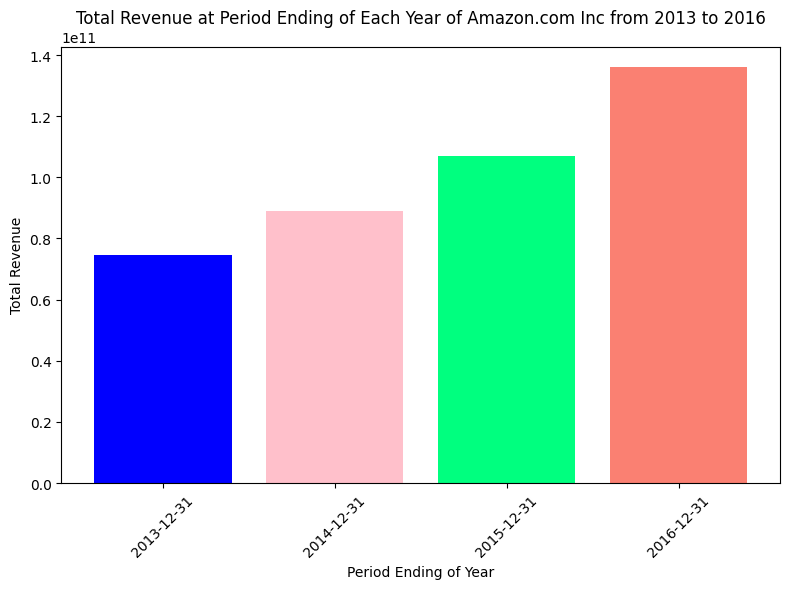

In [127]:
colors = ['blue', 'pink', 'springgreen', 'salmon']
plt.figure(figsize=(8,6))
plt.bar(df7['Period Ending'], df7['Total Revenue'], color=colors)
plt.xlabel('Period Ending of Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue at Period Ending of Each Year of Amazon.com Inc from 2013 to 2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Question 5: What was the total liability of Netflix Inc. in 2014?**

*Defining a variable to the name of the company that I want to obtain data for, and finding the row in this dataset where the value in the Security colunn equals the name of the company, "Netflix Inc.".*

In [128]:
company_name5 = "Netflix Inc."
selected_row5 = df2[df2['Security']==company_name5]
ticker5 = selected_row5['Ticker symbol'].values[0]
print(ticker5)

NFLX


### Dataset 1: "Fundamentals"

*Reading in the previously cleaned "Fundamentals" file using pandas.*

In [129]:
df = pd.read_csv('Fundamentals_Cleaned.csv')
df

,Unnamed: 0,Ticker Symbol,Period Ending,Gross Profit,Total Liabilities,Total Revenue
0,0,AAL,2012-12-31,1.435600e+10,2.489100e+10,2.485500e+10
1,1,AAL,2013-12-31,1.572400e+10,4.500900e+10,2.674300e+10
2,2,AAL,2014-12-31,2.703000e+10,4.120400e+10,4.265000e+10
3,3,AAL,2015-12-31,2.989400e+10,4.278000e+10,4.099000e+10
4,4,AAP,2012-12-29,3.098036e+09,3.403120e+09,6.205003e+09
...,...,...,...,...,...,...
1776,1776,ZION,2015-12-31,0.000000e+00,5.216201e+10,2.210591e+09
1777,1777,ZTS,2013-12-31,2.892000e+09,5.618000e+09,4.561000e+09
1778,1778,ZTS,2014-12-31,3.068000e+09,5.277000e+09,4.785000e+09
1779,1779,ZTS,2015-12-31,3.027000e+09,6.845000e+09,4.765000e+09


*Defining a variable to the ticker symbol that I want to obtain data for from this dataset, and finding the rows in this dataset where the value in the Ticker Symbol column equals the ticker symbol, "NFLX".*

In [130]:
ticker_symbol3 = "NFLX"
selected_rows6 = df[df['Ticker Symbol']==ticker_symbol3]
print(selected_rows6)

      Unnamed: 0 Ticker Symbol Period Ending  Gross Profit  Total Liabilities  \
1148        1148          NFLX    2013-12-31  1.257359e+09       4.079002e+09   
1149        1149          NFLX    2014-12-31  1.751896e+09       5.184792e+09   
1150        1150          NFLX    2015-12-31  2.188035e+09       7.979445e+09   
1151        1151          NFLX    2016-12-31  2.800768e+09       1.090681e+10   

      Total Revenue  
1148   4.374562e+09  
1149   5.504656e+09  
1150   6.779511e+09  
1151   8.830669e+09  


*Cleaning and defining the fundamentals dataset to a new dataset to include only the information that I found above.*

In [131]:
df8 = df[df['Ticker Symbol']=='NFLX']
df8

,Unnamed: 0,Ticker Symbol,Period Ending,Gross Profit,Total Liabilities,Total Revenue
1148,1148,NFLX,2013-12-31,1.257359e+09,4.079002e+09,4.374562e+09
1149,1149,NFLX,2014-12-31,1.751896e+09,5.184792e+09,5.504656e+09
1150,1150,NFLX,2015-12-31,2.188035e+09,7.979445e+09,6.779511e+09
1151,1151,NFLX,2016-12-31,2.800768e+09,1.090681e+10,8.830669e+09


*Creating a new column "Year" in the df8 dataset that shows the value of only the year from the "Period Ending" column and naming it to a new dataset df9, and including only the row with the value of the "Year" column being 2014.*

In [133]:
df8['Year'] = df8['Period Ending'].str.split('-').str[0].astype(int)
df9 = df8[df8['Year'] == 2014]
df9

C:\Users\Elizabeth\AppData\Local\Temp\ipykernel_13836\3298026479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Year'] = df8['Period Ending'].str.split('-').str[0].astype(int)


,Unnamed: 0,Ticker Symbol,Period Ending,Gross Profit,Total Liabilities,Total Revenue,Year
1149,1149,NFLX,2014-12-31,1.751896e+09,5.184792e+09,5.504656e+09,2014


*Extracting the value from df9 the value in the "Total Liabilities" column and defining it to a new variable "total_liabilities" and printing it.*

In [134]:
total_liabilities = df9['Total Liabilities'].values[0]
print(total_liabilities)

5184792000.0


**Answer: The total liabilities of Netflix Inc. in 2014 was 5184792000.0.**

*Creating and displaying a bar graph with the "Year" of the new dataset on the x-axis, and the "Total Liabilities" of the new dataset on the y axis, along with axis and title labels, colors, and other structural details.*

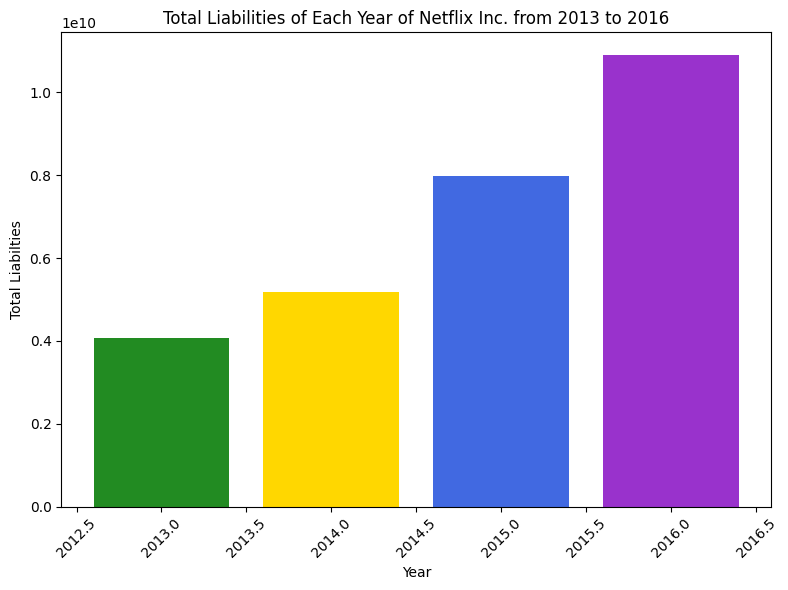

In [135]:
colors = ['forestgreen', 'gold', 'royalblue', 'darkorchid']
plt.figure(figsize=(8,6))
plt.bar(df8['Year'], df8['Total Liabilities'], color=colors)
plt.xlabel('Year')
plt.ylabel('Total Liabilties')
plt.title('Total Liabilities of Each Year of Netflix Inc. from 2013 to 2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()